# Getting started with interpies

*Joseph Barraud*

This notebook presents a few examples of how to use `interpies`.

---
At the core of `interpies` is the *grid* class that is used to load gridded data into memory. A large number of grid formats can be read thanks to `rasterio` and the underlying GDAL library. Once it has been created, the grid can be transformed, filtered and displayed alongside other grids or objects. 

Let's start by importing the `interpies` module.

In [ ]:
import interpies

In [1]:
# show the plots in the notebook
% matplotlib inline

## Loading data into an interpies *grid*

Thanks to `rasterio`, one of the required libraries of `interpies`, raster data can be easily loaded into a *grid* object, which is basically a numpy 2D array with attributes such as cell size, coordinate system and nodata value attached to it.

As an example, let's read some aeromagnetic data collected by the USGS over the town of Blanca in Colorado (Bankey and Grauch, 2004). The survey lines, the gridded data and the report are available from [this page](https://pubs.usgs.gov/of/2004/1229/B/).

I have downloaded the Reduced-to-the-pole (RTP) magnetic data that is provided in GXF format. The grid can be loaded with the function `open`.

In [4]:
inFile = r'..\data\brtpgrd.gxf'
grid1 = interpies.open(inFile)

`grid` objects have a few attributes such as `cellsize` and `ncols`:

In [5]:
print('The cell size is {} m.'.format(grid1.cellsize))
print('The number of columns is {}.'.format(grid1.ncols))

The cell size is 50.0 m.
The number of columns is 629.


This kind of metadata can be conveniently listed with the `info` method:

In [6]:
grid1.info()


* Info *
Grid name: brtpgrd
Filename: E:\Projects\Public Domain Data\USGS\SanLuisBasin\Blanca\Grids\brtpgrd.gxf
Coordinate reference system: epsg:26713
Grid size: 629 columns x 707 rows
Cell size: 50
Lower left corner (pixel centre): (440800.000,4118600.000)
Grid extent (outer limits): west: 440775.000, east: 472225.000, south: 4118575.000, north: 4153925.000
No Data Value: -1.0000000331813535e+32
Number of null cells: 191945 (43.16%)

* Statistics *
mean = -417.53436279296875
sigma = 109.33891296386719
min = -758.809814453125
max = 301.309814453125


### Grid data
The `numpy` array can be retrieved with the `data` attribute.

In [7]:
grid1.data

array([[-551.86798096, -551.96636963, -552.20178223, ...,           nan,
                  nan,           nan],
       [-551.01330566, -551.28338623, -551.63897705, ...,           nan,
                  nan,           nan],
       [-550.33190918, -550.70251465, -551.08630371, ...,           nan,
                  nan,           nan],
       ..., 
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)

## Displaying a grid

This is as easy as calling the `show` method.

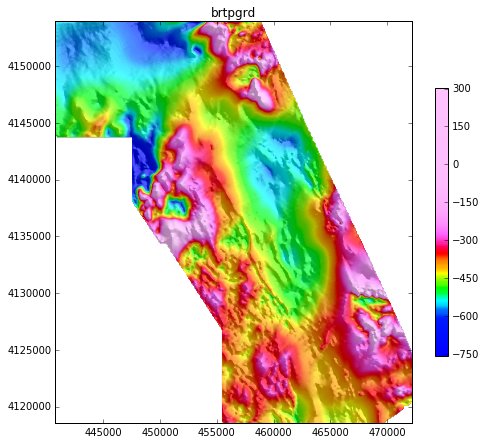

In [8]:
grid1.show()

You may have noticed that the `show` function returns matplotlib `axes`. This is useful to keep a handle on the figure and display additional objects. 

The `show` function has a lot of options and parameters. As you can see, it displays the data by default with a hillshading effect, the colormap is the classic `clra` color table by Geosoft, and histogram equalization is applied to rebalance the distribution of colours that would otherwise be dominated by extreme negative and positive anomalies.

It is possible to remove the hillshade, to use different colormaps and to apply linear normalisation in this way:

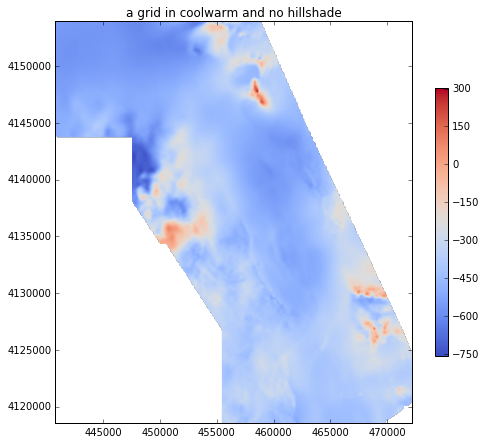

In [10]:
ax = grid1.show(hs=False, cmap='coolwarm', cmap_norm='none', title='a grid in coolwarm and no hillshade')

## Clipping

Zooming on a specific area can be done by clipping. Let's first look at the extent of the grid - these are the outer bounds of the grid, i.e. they include half a cell size in all directions. Additionally, the convention here is that the geographic location of the grid is defined by the centre of the cells. 

In [11]:
# west, south, east, north
grid1.extent

[440775.0, 472225.0, 4118575.0, 4153925.0]

The `clip` method returns a new grid.

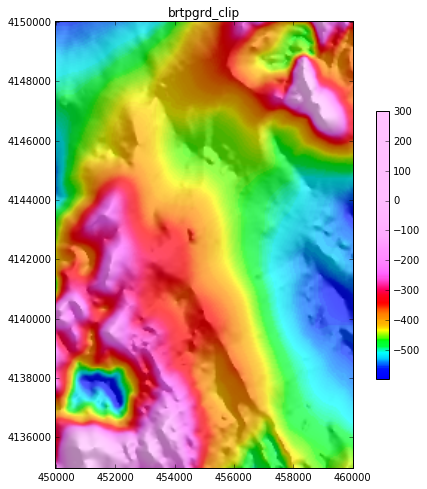

In [13]:
grid2 = grid1.clip(xmin=450000, xmax=460000, ymin=4135000, ymax=4150000)
grid2.show();

## Method chaining

As most grid methods return grid objects, several methods can be applied in sequence, without the need to keep track of each intermediate step. So the above example could be written as a chain, like that (with different values this time):

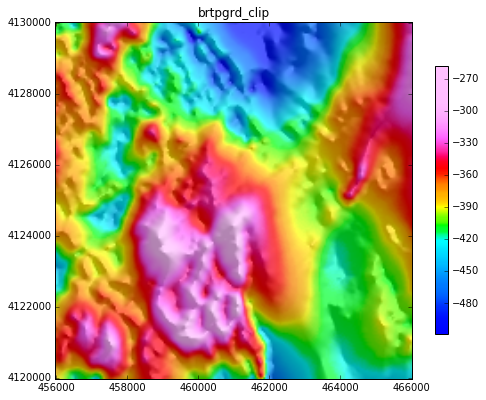

In [14]:
grid1.clip(xmin=456000, xmax=466000, ymin=4120000, ymax=4130000).show();

## Derivatives

`interpies` offers horizontal and vertical derivatives. Several methods have been implemented and this will be the subject of a separate notebook.

Transforms that make use of derivatives are also available directly. 

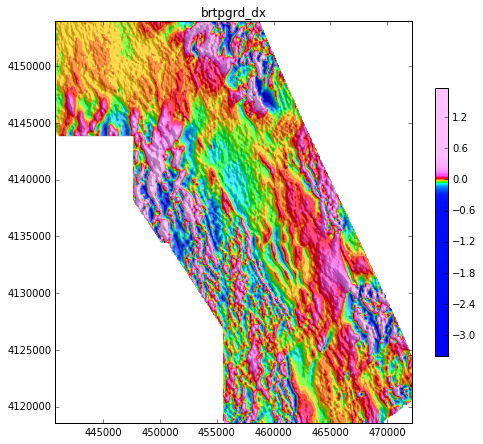

In [16]:
# Horizontal derivative in the x (west-east) direction
# The vertical exaggeration (zf) has to be increased for the hillshade to look good.
ax = grid1.dx().show(zf=1000)

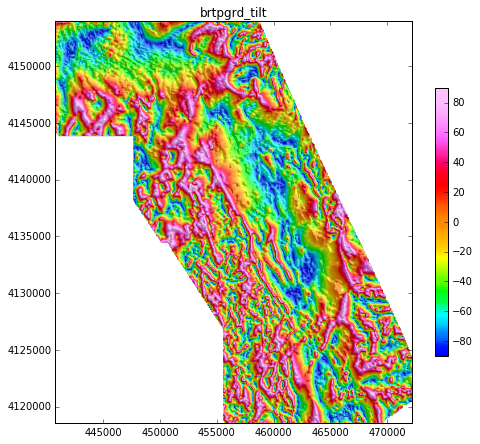

In [17]:
# tilt angle
ax = grid1.tilt().show()

To conclude this first notebook, let's calculate the horizontal gradient magnitude of the pseudogravity. This particular transform is described in the report of Bankey and Grauch (2004). The pseudogravity is basically a vertical integral of the RTP magnetic anomalies. The horizontal gradient highlights the steepest slopes. 

The calculation can be done in one line using a chain of functions. I am starting with a linear detrend to improve the quality of the vertical integration. 

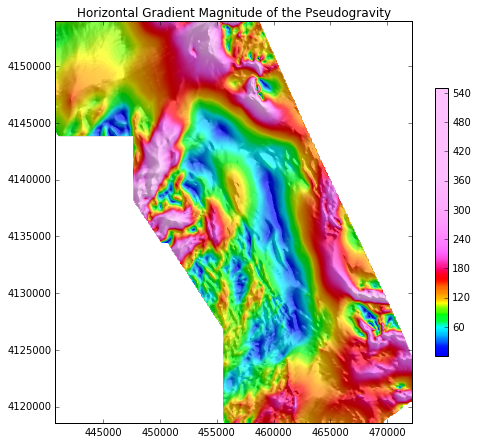

In [19]:
ax = grid1.detrend().vi().hgm().show(title='Horizontal Gradient Magnitude of the Pseudogravity')

## Reference
Bankey, V., Grauch, V.J.S., 2004. Digital aeromagnetic data and derivative products from a helicopter survey over the town of Blanca and surrounding areas, Alamosa and Costilla counties, Colorado, Open-File Report.